# Day 2: Apache Spark and Python

## 2.0 Recap of last week

Last week, we spent a whole day learning the fundamentals of Python from scratch.  We learned how to:
* Call Python from the command line, both interactively and for scripts with arguments
* Write IPython notebooks
* Use PyCharm (a bit)
* Use the basic data types:
  - `int`
  - `float`
  - `bool`
  - `str`
  - `list`
  - `tuple`
  - `dict`
* Control program flow with `if`, `while` and `for`
* Import external modules and write your own simple modules
* Use functions to structure your program

To refresh your mind, here's the quick summary from the beginning of Day 2:

Python values come in several types:

In [1]:
a = 1                 # int
b = 5.4               # float
c = "Hello"           # str
d = True              # bool
e = [1,2,3]           # list
f = (5,6)             # tuple
g = {'a': 1, 'b': 2}  # dict

Arithmetic operations work as you expect:

In [2]:
print(100 * (1.07**7 - 1))  # Interest on €100 over 7 years at 7%

60.5781476478


Lists can be accessed and modified in various ways:

In [3]:
fruits = ['apple', 'orange', 'pear']
print(fruits[1])    # 2nd item (0, 1, 2, ...)
print(fruits[0:2])  # Slice from 0 (inclusive) to 2 (exclusive)
print(fruits[:2])   # First 2 items
print(fruits[-1])   # Last item
print(fruits[-2:])  # Last 2 items

orange
['apple', 'orange']
['apple', 'orange']
pear
['orange', 'pear']


In [4]:
fruits.append('lemon')  # Add
del fruits[0]           # Remove
fruits[0:2] = ['banana', 'kiwi', 'grape']  # Slice replacement

List comprehensions are a powerful way to build one list from another

In [5]:
print([i*i for i in range(1,10+1)])  # First 10 squares

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [6]:
# Ways to express 24 as a product of 2 positive integers
n = 24
print([(a,b) for a in range(1,n+1) for b in range(a, n+1) if a*b == n])

[(1, 24), (2, 12), (3, 8), (4, 6)]


Tuples give you lots of idiomatic ways of dealing with compound data:

In [7]:
ages = {'John': 30, 'Jane': 25, 'Jack': 10, 'Jill': 42}
for name, age in sorted(ages.items()):
    print("{0} is {1} years old".format(name, age))

Jack is 10 years old
Jane is 25 years old
Jill is 42 years old
John is 30 years old


In [8]:
for i, fruit in enumerate(fruits):
    print("Fruit number {0} is '{1}'".format(i, fruit))

Fruit number 0 is 'banana'
Fruit number 1 is 'kiwi'
Fruit number 2 is 'grape'
Fruit number 3 is 'lemon'


Functions allow you to build complex behaviours from simpler parts:

In [9]:
# Breaking up the above loop over a dictionary into smaller pieces
# (this is a bit artificial: normally, only break up pieces of code
# that are conceptually separate or more than about 10 lines long)

def format_output(name, age):
    return "{0} is {1} years old".format(name, age)

def print_all_ages(ages):
    for name, age in sorted(ages.items()):
        print(format_output(name, age))
        
def make_ages_dict():
    return {
        'John': 30,
        'Jane': 25,
        'Jack': 10,
        'Jill': 42
    }

def main():
    print_all_ages(make_ages_dict())
    
main()

Jack is 10 years old
Jane is 25 years old
Jill is 42 years old
John is 30 years old


Related definitions can be packaged into a module (also called a library).  You can then import these modules in other code.

In [10]:
from math import pi, e, sin
import re

print(sin(1.5*pi)+e)
m = re.match(r'(\d{4})-(\d{2})-(\d{2})', '2015-12-06')
print(m.groups())

1.71828182846
('2015', '12', '06')


---

On Day 1, we talked about `NumPy`, `SciPy`, `Matplotlib`, `Pandas` and `Scikit-learn`:

NumPy `arrays` are like Python lists, with two big differences:
* Every element is of the same type
* We can write vectorized operations between arrays

In [11]:
import numpy as np
A = np.array([1.0, 2.0, 3.0])
B = np.array([5.0, 6.0, 7.0])
C = A + 3*B

print(A)
print(B)
print(C)
print(np.sum(C*C))

[ 1.  2.  3.]
[ 5.  6.  7.]
[ 16.  20.  24.]
1232.0


There are various ways of creating NumPy arrays:

In [12]:
A = np.array([1.0, 2.0, 3.0])     # From a Python list
B = np.arange(10)                 # Like range()
C = np.linspace(-10.0, 10.0, 21)  # Elements equally spaced between bounds
D = np.zeros(10)                  # All zeros
E = np.ones(4)                    # All ones

Can index by lists and by Boolean arrays:

In [13]:
F = np.arange(10)
print(F[F % 2 == 1])

[1 3 5 7 9]


Arrays can have multiple dimensions, most commonly two for matrices:

In [14]:
M = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [15]:
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Multi-dimensional arrays have other interesting operators:

In [16]:
M.T           # Transpose
M.trace()     # Trace
np.dot(M, A)  # Matrix-vector product

array([ 14.,  32.,  50.])

Indexing / slicing happens on each dimension independently:

In [17]:
M[0,1]        # Specific item
M[0,:]        # First row
M[:,1]        # Second column
M[0:2, 1:2]   # Submatrix

array([[2],
       [5]])

NumPy and SciPy have plenty of support for linear algebra.

There are also plenty of functions dealing with random numbers and probability distributions:

In [18]:
surveys = np.random.binomial(n=100, p=0.6, size=1000) / 100.0
print("Mean {0:.1%} +/- {1:.1%}".format(np.mean(surveys), np.std(surveys)))

Mean 60.2% +/- 5.0%


`Matplotlib` has wide facilities for plotting.  The best way (_honestly!_) to learn it is by example / Stack Overflow.

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

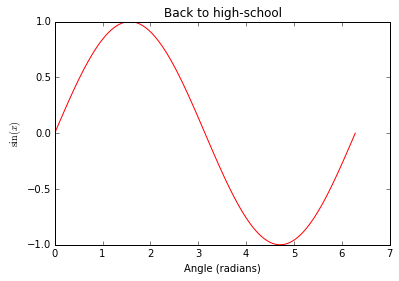

In [20]:
import math
x = np.linspace(0.0, 2*math.pi, 100)
y = np.sin(x)
plt.plot(x, y, 'r-')
plt.xlabel('Angle (radians)')
plt.ylabel('$\sin(x)$')
plt.title('Back to high-school')

`Pandas` is like _Excel for Python_.  We only scratched the surface and I really recommend going through Wes McKinney's book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

We won't use Pandas for the rest of the training, but just to jostle your memory...

In [21]:
import pandas as pd
from pandas import DataFrame, Series

In [22]:
populations = {
    'year': [1950, 1950, 2000, 2000],
    'province': ['Antwerp', 'Parking Space', 'Antwerp', 'Parking Space'],
    'population': [270000, 4900000, 480000, 5900000]
}
df = DataFrame(populations, columns=['year', 'province', 'population'])
df

,year,province,population
0,1950,Antwerp,270000
1,1950,Parking Space,4900000
2,2000,Antwerp,480000
3,2000,Parking Space,5900000


In [23]:
df.groupby('year').population.sum()

year
1950    5170000
2000    6380000
Name: population, dtype: int64

`Scikit-learn` has plenty of functions to generate random data with some underlying pattern, and other functions to apply machine learning algorithms to such kinds of data.  Here's the linear regression example from yesterday as a refresher:

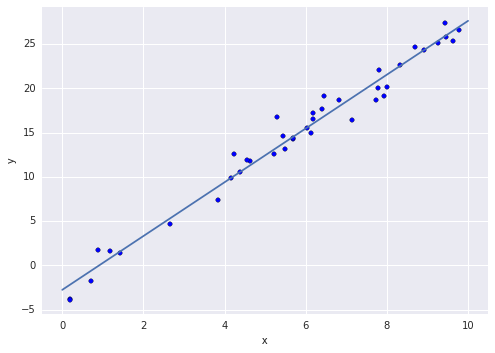

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model

# Optional: importing this package makes the default plot settings nicer
import seaborn as sns; sns.set()

def linear_data_sample(N=40, rseed=0, m=3, b=-2):
    """Sample N points on the line y = m*x + b + err, where err is normally distributed"""
    rng = np.random.RandomState(rseed)

    x = 10 * rng.rand(N)
    y = m * x + b + 1.5*rng.randn(N)

    return x, y

# Generate data, then apply linear regression to it
x, y = linear_data_sample()
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x.reshape((len(x), 1)), y)   # Scikit-learn expects x to be a column-vector

# predict y from the data
x_new = np.linspace(0, 10, 100)
y_new = regr.predict(x_new.reshape((len(x_new), 1)))  # Column vector

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight');

---

Today, we'll switch gears to learn about `Spark`, a framework for big-data analysis.  Concretely, after today, you should be able to:
* Understand the role of Spark and pyspark in the eco-system
* Run spark locally from a shell
* Run spark locally in IPython Notebooks
* Do a word count on an input file
* Load data in SparkSQL
* Query data in SparkSQL
* Use Spark MLlib to perform regression and classification analyses at scale